# Proyek Analisis Data: Most Streamed Spotify Songs 2023 Analysis

*   **Nama:** Riza Nursyah
*   **Email:** rizanursyah02@gmail.com
*   **Instansi:** Universitas Muhammadiyah Sukabumi
*   **Prodi:** Teknik Informatika

# Beberapa Hal yang Akan di Analisis:


*   Top 10 Lagu Dengan Streams Terbanyak
*   Top 10 Artis Dengan Streams Terbanyak
*   Pengaruh Bulan Terhadap Jumlah Streams
*   Pengaruh Featuring (Kolaborasi) Terhadap Jumlah Streams

#Import Package/Library yang Akan Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Data Wrangling

## Gathering Data

In [ ]:
# Membaca file CSV dengan menentukan pengkodean 'latin1'
spotify_df = pd.read_csv('https://raw.githubusercontent.com/rizanss/Most-Streamed-Spotify-Songs-2023/main/data/most_streamed_spotify_songs_analysis.csv', encoding='latin1')
spotify_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


## Assessing Data

In [ ]:
#Menilai data spotify_df
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
#Memeriksa missing values pada spotify_df
spotify_df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [ ]:
#Memeriksa duplikasi data pada spotify_df
print('Jumlah duplikasi: ', spotify_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
#Memeriksa parameter statistik pada spotify_df
spotify_df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


## Cleaning Data

In [ ]:
# Menghapus kolom yang tidak diperlukan
spotify_df = spotify_df.drop(columns = ['in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts'])

In [ ]:
# Memeriksa nilai null dan tipe data
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   bpm                   953 non-null    int64 
 10  key                   858 non-null    object
 11  mode                  953 non-null    object
 12  danceability_%        953 non-null    int64 
 13  valence_%             953 non-null    int64 
 14  energy_%              953 non-null    int64 
 15  acousticness_%        953 non-null    in

In [ ]:
# Memeriksa baris
spotify_df.iloc[574]

track_name                            Love Grows (Where My Rosemary Goes)
artist(s)_name                                          Edison Lighthouse
artist_count                                                            1
released_year                                                        1970
released_month                                                          1
released_day                                                            1
in_spotify_playlists                                                 2877
in_spotify_charts                                                       0
streams                 BPM110KeyAModeMajorDanceability53Valence75Ener...
bpm                                                                   110
key                                                                     A
mode                                                                Major
danceability_%                                                         53
valence_%                             

In [ ]:
# Menghilangkan baris pada index ke 574
spotify_df = spotify_df.drop(spotify_df.iloc[[574]].index)

In [ ]:
# Mengubah tipe data kolom streams menjadi integer
spotify_df['streams'] = spotify_df['streams'].astype(int)

In [ ]:
# Menambahkan kolom baru 'streams in million'
spotify_df['streams_in_million'] = spotify_df['streams'].apply(lambda x: x / 1000000).round(2)
spotify_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams_in_million
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,125,B,Major,80,89,83,31,0,8,4,141.38
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,92,C#,Major,71,61,74,7,0,10,4,133.72
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,138,F,Major,51,32,53,17,0,31,6,140.00
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,170,A,Major,55,58,72,11,0,11,15,800.84
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,144,A,Minor,65,23,80,14,63,11,6,303.24


In [ ]:
# Melakukan pemetaan dari nomor bulan ke nama bulan
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Des'}

In [ ]:
# Membuat kolom baru bernama 'Month_Abbreviation'
spotify_df['Month_Abbreviation'] = spotify_df['released_month'].map(month_names)
spotify_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams_in_million,Month_Abbreviation
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,125,...,Major,80,89,83,31,0,8,4,141.38,Jul
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,92,...,Major,71,61,74,7,0,10,4,133.72,Mar
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,138,...,Major,51,32,53,17,0,31,6,140.00,Jun
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,170,...,Major,55,58,72,11,0,11,15,800.84,Aug
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,144,...,Minor,65,23,80,14,63,11,6,303.24,May


# Data Analysis and Data Visualization

## Top 10 Songs by Streams

In [ ]:
# Kelompokkan data berdasarkan 'track_name' dan hitung jumlah total streaming
top_tracks = spotify_df.groupby('track_name')['streams_in_million'].sum().reset_index()

# Urutkan data berdasarkan jumlah total streaming secara menurun
top_tracks = top_tracks.sort_values(by='streams_in_million', ascending=False)

# Ambil 10 lagu teratas
top_10_tracks = top_tracks.head(10)

top_10_tracks

,track_name,streams_in_million
100,Blinding Lights,3703.90
692,Shape of You,3562.54
722,Someone You Loved,2887.24
184,Dance Monkey,2864.79
752,Sunflower - Spider-Man: Into the Spider-Verse,2808.10
562,One Dance,2713.92
661,STAY (with Justin Bieber),2665.34
87,Believer,2594.04
153,Closer,2591.22
735,Starboy,2565.53


<ipython-input-16-297eb775a6e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='streams_in_million', y='track_name', data=top_10_tracks, palette='bright')


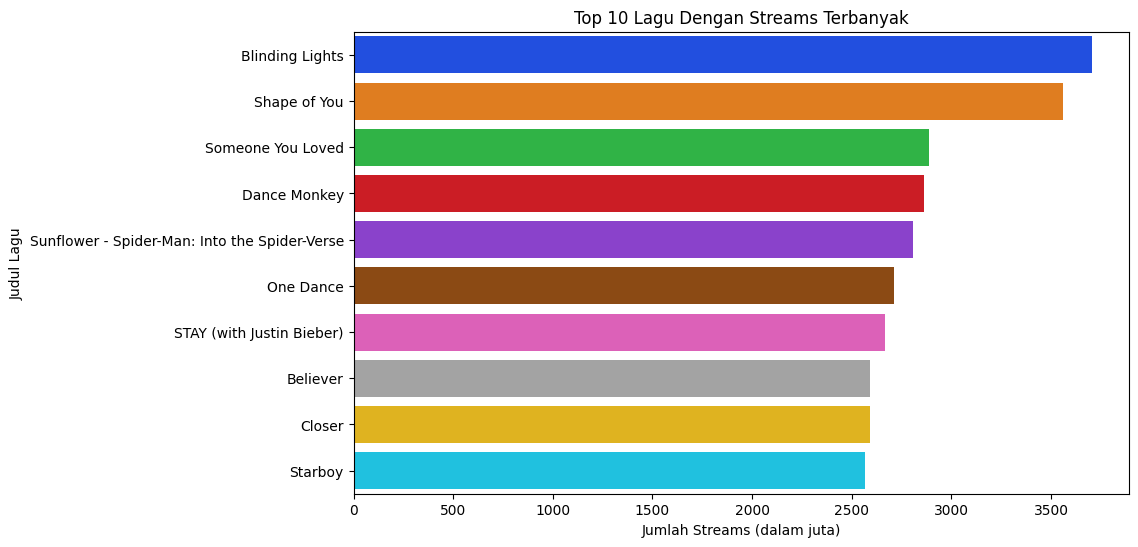

                                        track_name  streams_in_million
100                                Blinding Lights             3703.90
692                                   Shape of You             3562.54
722                              Someone You Loved             2887.24
184                                   Dance Monkey             2864.79
752  Sunflower - Spider-Man: Into the Spider-Verse             2808.10
562                                      One Dance             2713.92
661                      STAY (with Justin Bieber)             2665.34
87                                        Believer             2594.04
153                                         Closer             2591.22
735                                        Starboy             2565.53


In [ ]:
# Visualisasikan dalam bentuk grafik batang
plt.figure(figsize=(10, 6))
sns.barplot(x='streams_in_million', y='track_name', data=top_10_tracks, palette='bright')
plt.title('Top 10 Lagu Dengan Streams Terbanyak')
plt.xlabel('Jumlah Streams (dalam juta)')
plt.ylabel('Judul Lagu')
plt.show()

# Tampilkan tabel dengan data top 10 lagu
print(top_10_tracks)

## Top 10 Artists by Streams

In [ ]:
# Kelompokkan data berdasarkan 'artist(s)_name' dan hitung jumlah total streaming
top_artists = spotify_df.groupby('artist(s)_name')['streams_in_million'].sum().reset_index()

# Urutkan data berdasarkan jumlah total streaming secara menurun
top_artists = top_artists.sort_values(by='streams_in_million', ascending=False)

# Ambil 10 artis teratas
top_10_artists = top_artists.head(10)

top_10_artists

,artist(s)_name,streams_in_million
571,The Weeknd,14185.54
557,Taylor Swift,14053.65
159,Ed Sheeran,13908.94
222,Harry Styles,11608.63
43,Bad Bunny,9997.79
430,Olivia Rodrigo,7442.15
170,Eminem,6183.80
75,Bruno Mars,5846.93
25,Arctic Monkeys,5569.81
228,Imagine Dragons,5272.48


<ipython-input-18-9b12e099ad7a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='streams_in_million', y='artist(s)_name', data=top_10_artists, palette='bright')


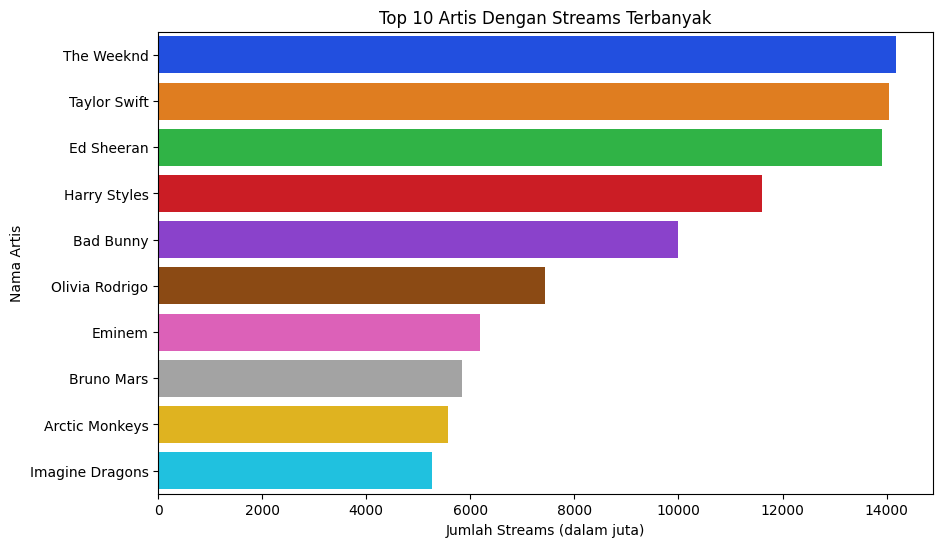

      artist(s)_name  streams_in_million
571       The Weeknd            14185.54
557     Taylor Swift            14053.65
159       Ed Sheeran            13908.94
222     Harry Styles            11608.63
43         Bad Bunny             9997.79
430   Olivia Rodrigo             7442.15
170           Eminem             6183.80
75        Bruno Mars             5846.93
25    Arctic Monkeys             5569.81
228  Imagine Dragons             5272.48


In [ ]:
# Visualisasikan dalam bentuk grafik batang
plt.figure(figsize=(10, 6))
sns.barplot(x='streams_in_million', y='artist(s)_name', data=top_10_artists, palette='bright')
plt.title('Top 10 Artis Dengan Streams Terbanyak')
plt.xlabel('Jumlah Streams (dalam juta)')
plt.ylabel('Nama Artis')
plt.show()

# Tampilkan tabel dengan data top 10 artis
print(top_10_artists)

## The Effect of Collaboration on The Number of Streams

In [ ]:
# Pengaruh kolaborasi terhadap jumlah streams
featuring_songs = spotify_df.filter(items = ['artist(s)_name', 'artist_count', 'streams_in_million'], axis = 1)
featuring_songs

,artist(s)_name,artist_count,streams_in_million
0,"Latto, Jung Kook",2,141.38
1,Myke Towers,1,133.72
2,Olivia Rodrigo,1,140.00
3,Taylor Swift,1,800.84
4,Bad Bunny,1,303.24
...,...,...,...
948,Selena Gomez,1,91.47
949,Taylor Swift,1,121.87
950,"Feid, Paulo Londra",2,73.51
951,"Feid, Sech, Jhayco",3,133.90


In [ ]:
# Visualisasi Pengaruh Kolaborasi terhadap Jumlah Streaming
featuring_songs_plt = px.scatter(featuring_songs, x = 'artist_count', y = 'streams_in_million', width = 1200,
                                 height = 700, template = 'seaborn', title = 'The Effect of Collaboration on The Number of Streams',
                                 color = 'streams_in_million', labels = {'artist_count': 'Number of Artist', 'streams_in_million': 'Number of Streams'})

featuring_songs_plt

## The Effect of Month on The Number of Streams

In [ ]:
# Kelompokkan data berdasarkan 'released_month' dan hitung jumlah total streaming
streams_by_month = spotify_df.groupby('released_month')['streams_in_million'].sum().reset_index()

# Urutkan data berdasarkan bulan
streams_by_month = streams_by_month.sort_values(by='released_month')

streams_by_month

,released_month,streams_in_million
0,1,96758.28
1,2,21542.38
2,3,41026.53
3,4,26673.65
4,5,53205.68
5,6,35263.87
6,7,29894.93
7,8,29038.23
8,9,41140.09
9,10,42989.85


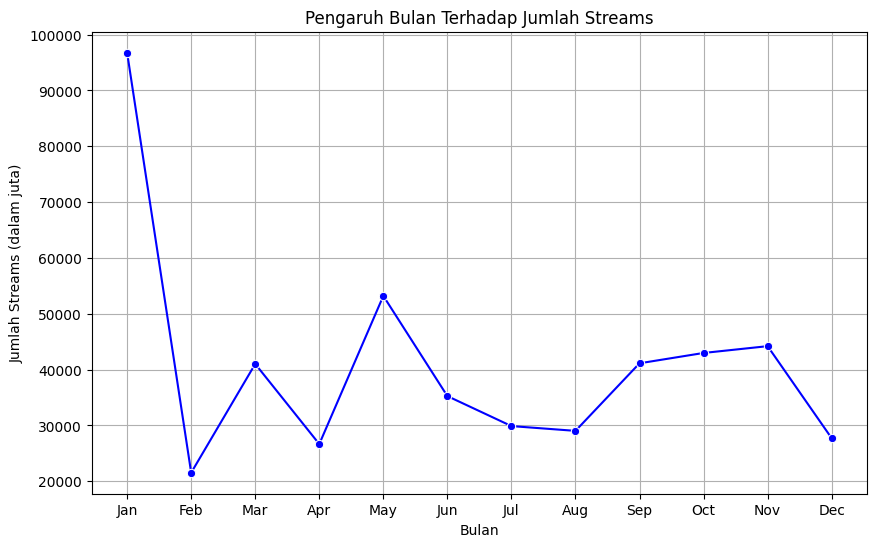

In [ ]:
# Visualisasikan perubahan jumlah streaming dari bulan ke bulan
plt.figure(figsize=(10, 6))
sns.lineplot(x='released_month', y='streams_in_million', data=streams_by_month, marker='o', color='blue')
plt.title('Pengaruh Bulan Terhadap Jumlah Streams')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Streams (dalam juta)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()